## Multiple Linear regression

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Import data and load variables as ID and D 
companies=pd.read_csv('C:/Users/HP/Desktop/DA/final/linearmodel.csv')
X=companies.iloc[:,:4].values
y=companies.iloc[:,4].values

In [3]:
companies.head()

,x1,x2,x3,x4,y
0,0.636682,0.764120,0.301581,0.359851,463.26
1,0.446943,0.661130,0.691431,0.677439,444.37
2,0.892136,0.459750,0.258183,0.053760,488.56
3,0.683410,0.410682,0.587716,0.543195,446.48
4,0.952464,0.384871,0.223244,0.231200,473.90


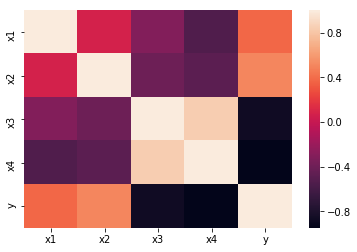

In [4]:
# Data visualization
# Correlation matrix
sns.heatmap(companies.corr())

In [5]:
# Split training and testing dataset (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [6]:
len(X_test)

200

In [7]:
# Fitting regression model
from sklearn.linear_model import LinearRegression
model_fit=LinearRegression()
model_fit.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# Predicting test set results
y_pred=model_fit.predict(X_test)
print(y_pred)
len(y_pred)

[483.85525765 462.80434785 431.37247395 449.04083939 473.41260099
 446.91487198 479.55007345 435.55459329 443.08993135 460.44774793
 472.96372077 475.94646697 446.24046023 461.63952346 461.23729993
 447.02093134 454.11786546 429.32880133 435.36127633 436.29334485
 441.98339801 472.73080301 439.53872019 468.88709814 478.95322482
 454.60852849 451.50126958 432.27978759 444.70317068 444.33544147
 483.65305355 469.5887008  474.65142236 437.74733265 443.88199346
 477.3673644  467.69271239 449.16022782 479.50115345 442.35331747
 465.56694371 451.75725989 441.86208882 469.15687046 442.80427145
 436.52774196 432.88520037 472.99905879 447.766803   461.55017841
 451.97768871 439.69975037 471.86334726 435.31328883 454.091256
 444.85945647 476.7656754  448.22494406 447.87459211 479.47504704
 462.96443615 445.27569849 427.38045375 452.47769317 462.74978027
 428.78627071 463.09036714 466.92273239 487.3115598  479.42909193
 476.04412359 428.03253121 445.703473   452.10191871 447.73102889
 472.1844745

200

In [9]:
# Calculating coefficients
print(model_fit.coef_)
print(model_fit.intercept_)

[-12.65321539   2.84833884 -10.91562603 -65.85736552]
500.2693617091388


In [10]:
# Calculating R square
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

0.9367442425823448

In [11]:
mean_squared_error(y_test,y_pred)

18.831681589938047

# Example 2
## With categorical variables

In [12]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [13]:
# Import data and load variables as ID and D 
companies=pd.read_csv('C:/Users/HP/Desktop/DA/final/1000_companies.csv')
X=companies.iloc[:,:4].values
y=companies.iloc[:,4].values

In [14]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


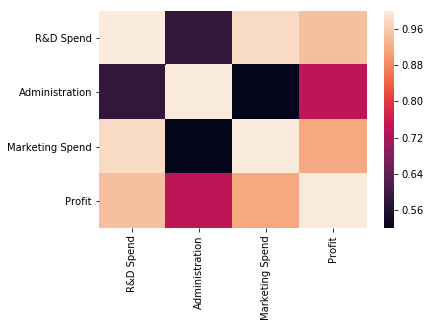

In [15]:
# Data visualization
# Correlation matrix
sns.heatmap(companies.corr())

In [16]:
# Encoding categorical data if any
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder=LabelEncoder()
X[:,3]=labelencoder.fit_transform(X[:,3])
# 3rd column from 0th index 

onehotencoder=OneHotEncoder(categorical_features=[3])
X=onehotencoder.fit_transform(X).toarray()

In [17]:
# Avoid dummy variable trap
X=X[:,1:]
# Removing one column from onehotencoder

In [18]:
# Split training and testing dataset (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
len(X_test)

200

In [20]:
# Fitting regression model
from sklearn.linear_model import LinearRegression
model_fit=LinearRegression()
model_fit.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# Predicting test set results
y_pred=model_fit.predict(X_test)
print(y_pred)
len(y_pred)

[ 89790.61532915  88427.07187361  94894.67836972 175680.86725611
  83411.73042088 110571.90200074 132145.22936439  91473.37719686
 164597.05380606  53222.82667401  66950.19050989 150566.43987005
 126915.20858596  59337.8597105  177513.91053062  75316.28143051
 118248.14406603 164574.40699902 170937.2898107  182069.11645084
 118845.03252689  85669.95112229 180992.59396144  84145.08220145
 105005.83769214 101233.56772747  53831.07669091  56881.41475224
  68896.39346905 210040.00765883 120778.72270894 111724.87157654
 101487.90541518 137959.02649624  63969.95996743 108857.91214126
 186014.72531988 171442.64130747 174644.26529205 117671.49128195
  96731.37857433 165452.25779409 107724.34331255  50194.54176913
 116513.89532179  58632.4898682  158416.4682761   78541.48521609
 159727.66671743 131137.87699644 184880.70924516 174609.0826688
  93745.66352059  78341.13383418 180745.9043908   84461.61490552
 142900.90602903 170618.44098397  84365.09530839 105307.3716218
 141660.07290787  52527.343

200

In [22]:
# Calculating coefficients
print(model_fit.coef_)
print(model_fit.intercept_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]
-51035.22972402591


In [23]:
# Calculating R square
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

0.9112695892268863

In [ ]:
# mean_squared_error(y_test,y_pred)